# Scripts de PyPlot para hacer figuras chingonas para poster

Primero, vamos a intentarlo con un experimento que tenga una actividad notoria. Aquí cargamos un archivo que contiene los datos de un experimento con actividad epiléptica. La región CA aparece muy activa varias veces en las mediciones del potencial de campo local, LFP de ahora en adelante.

In [1]:
using PyPlot
using JLD

In [2]:
function estavacia(arxiv)
    suaca=stat(arxiv)
    result=(suaca.size==0)
end

function AntesQue(Datos::Array, tiempo)
    Cadena=[0 0 0 0]
    for a in eachindex(Datos[:,4])
        if Datos[a,4]+40<tiempo
            Cadena=vcat(Cadena, Datos[a,:])
    end
end
    Cadena=Cadena[2:end,:]
    return Cadena
end

AntesQue (generic function with 1 method)

In [41]:
tmax=1300
onsetofattack=349
CSD=load("CSD4APForPaperTotal.jld", "CSD")
CSDPlanchado=load("CSD4APForPaperTotal.jld", "CSDPlanchada");

In [12]:
dobleprimax=[44,48,52,54,58, 63]
dobleprimay=[38,42,45,47,50, 54]
dobleprimal=["F''","E''", "D''", "C''", "B''","A''"];
primax=[32, 32, 32, 32, 32, 32]
primay=[43,47,51,55,59,63]
primal=["F'","E'", "D'", "C'", "B'","A'"];
puntox=[44,48,52,55,58,62]
puntoy=[38,36,34,32,30,28]
puntol=["F","E", "D", "C", "B","A"];

In [19]:
function partepositiva(x)
    if x>0
        return x
    else
        return 0
    end
end

function partenegativa(x)
    if x<0
        return x
    else
        return 0
    end
end
    

partenegativa (generic function with 1 method)

In [21]:
CSDPositivo=map(x->partepositiva(x),CSDPlanchado)
CSDNegativo=map(x->partenegativa(x),CSDPlanchado);


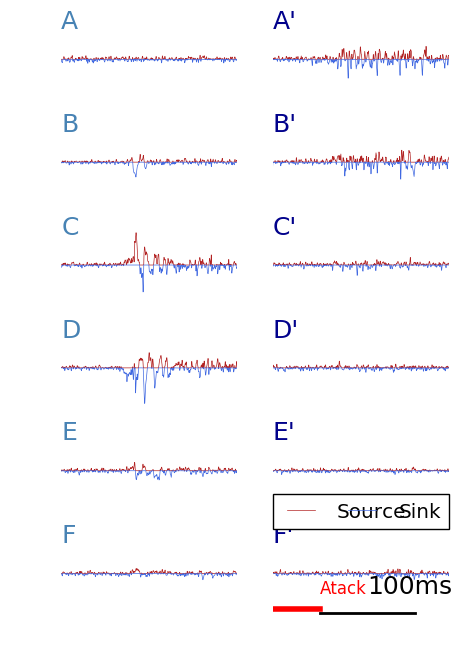

PyObject <matplotlib.legend.Legend object at 0x7fbc8f8dafd0>

In [40]:
tiempo=1:tmax
t=700

farofa, lista=subplots(6,2, sharex=true, sharey=true, figsize=(5,6*1.25))

for j=1:6
    PyPlot.xlim(1/7022,tmax/7022)
    PyPlot.ylim(-110,110)
    lista[j,1][:plot](tiempo/7022,vec(CSDPositivo[puntoy[7-j],puntox[7-j],tiempo]), color="firebrick", lw=0.5)
    lista[j,1][:plot](tiempo/7022,vec(CSDNegativo[puntoy[7-j],puntox[7-j],tiempo]), color="royalblue", lw=0.5)
   
    lista[j,1][:annotate](puntol[7-j],xy=(0.0,80), annotation_clip=false, fontsize=18,color="steelblue")
    lista[j,1][:axis]("off")
    
    lista[j,2][:plot](tiempo/7022,vec(CSDPositivo[primay[7-j],primax[7-j],tiempo]),lw=0.5, color="firebrick", label="Source")
    lista[j,2][:plot](tiempo/7022,vec(CSDNegativo[primay[7-j],primax[7-j],tiempo]),lw=0.5, color="royalblue", label="Sink")
    
    lista[j,2][:annotate](primal[7-j],xy=(0.00,80), annotation_clip=false, fontsize=18,color="darkblue")
    lista[j,2][:axis]("off")
    
  #  lista[j,3][:plot](tiempo/7022,vec(DatosExperimentales[dobleprimay[7-j],dobleprimax[7-j],tiempo]))
  #  lista[j,3][:annotate](dobleprimal[7-j],xy=(0.0,200), annotation_clip=false, fontsize=18)
end

lista[6,2][:plot]([0.05,0.15],[-100,-100], color="black", lw=2)
lista[6,2][:plot]([0.0,349/7022],[-90,-90], color="red", lw=4)
lista[6,2][:annotate]("Atack", xy=(0.05,-50),annotation_clip=false, fontsize=12, color="red")

lista[6,2][:annotate]("100ms", xy=(0.1,-50),annotation_clip=false, fontsize=18)
lista[6,2][:legend](bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
#savefig("CSD_A-F_yOtros_Points_01.svg",dpi=90)

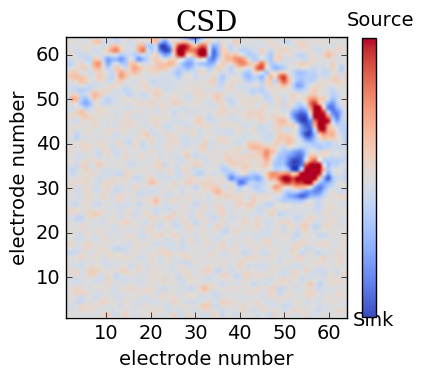

false

In [35]:
PyPlot.ion()
#################
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20)


t=550
seg=round(t/7.022, 1)
titulo="$seg ms"
limites=50
figure(figsize=(4,3.66))
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)
#tick_params(labelbottom="off", labelleft="off")
otraimagen=imshow(CSDPlanchado[:,:,t], cmap="coolwarm", interpolation="spline16", 
origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])
#cb=colorbar(otraimagen)
#cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04, use_gridspace='True')
cb=colorbar(otraimagen, ticks=[-150, +150], use_gridspec="True",fraction=0.045 )
#farofa=cb[:set_ticklabels]([{"Sink"}, {"Source"}])
#xlabel("furufu", fontdict=font1)
tick_params(axis="both", labelsize=14)
#contour(0:63, 0:63, CSDPlanchada[:,:,t], levels=[-1,1])


annotate("Sink",
    xy=[1.07;-0.09],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=14.0,
    ha="left",
    va="bottom")

annotate("Source",
    xy=[1.05;0.98],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=14,
    ha="left",
   va="bottom")

xlabel("electrode number", fontsize=14)

ylabel("electrode number", fontsize=14)

title("CSD", fontdict=font1)

savefig("CSDPlanchada-$t.svg", dpi=90)

#tight_layout()

PyPlot.close_queued_figs()

In [4]:
CatenarioPositivo=load("Catenarios4AP.jld", "CatenarioPositivo")
CatenarioNegativo=load("Catenarios4AP.jld", "CatenarioNegativo");

In [ ]:

PyPlot.ioff()

for cuadro=1:1300
#cuadro=301

    CSDEjemplo=CSDPlanchado[:,:,cuadro];
#map!(x->abs(x)<10? 0:x, CSDEjemplo)

#################
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>16)
seg=round((cuadro)/7.022, 1)
titulo="$seg ms"
figure(figsize=(4,3.5))
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)
limcsd=50

otraimagen=imshow(CSDEjemplo, cmap="BrBG", origin="lower", vmin=-limcsd, vmax=limcsd, 
interpolation="sinc", extent=[1,64,1,64])

#cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04)
#cb=colorbar(otraimagen, ticks=[-150, +150], use_gridspec="True")
#farofa=cb[:set_ticklabels](["Sink", "Source"])
#xlabel("furufu", fontdict=font1)

    if !(estavacia("CenterOfMassCollector/CMFuentes-$cuadro.dat"))        
        EjemploCentrosCSDPos=readdlm("CenterOfMassCollector/CMFuentes-$cuadro.dat")
        xxpos=EjemploCentrosCSDPos[:,1]
        yypos=EjemploCentrosCSDPos[:,2]
        valorpos=EjemploCentrosCSDPos[:,3]
        
    scatter(xxpos,yypos, s=valorpos, alpha=0.8, c=valorpos,cmap="viridis", edgecolors="none")
        scatter(xxpos,yypos, s=0.02*valorpos, alpha=0.9, c="yellow", edgecolors="black")
    end
    
    if !(estavacia("CenterOfMassCollector/CMPozos-$cuadro.dat"))        
        EjemploCentrosCSDNeg=readdlm("CenterOfMassCollector/CMPozos-$cuadro.dat")
        xxneg=EjemploCentrosCSDNeg[:,1]
        yyneg=EjemploCentrosCSDNeg[:,2]
        valorneg=EjemploCentrosCSDNeg[:,3];

    scatter(xxneg, yyneg, s=abs(valorneg), alpha=0.8, c=valorneg,cmap="inferno", edgecolors="none")
        scatter(xxneg, yyneg,s=0.02*abs(valorneg), alpha=0.9, c="green", edgecolors="black")
    end
        
tick_params(axis="both", labelsize=14)

title(titulo, fontdict=font1)
 tight_layout()
savefig("AcidCSD_CM-$cuadro.png", dpi=90)
end
PyPlot.close_queued_figs()

In [ ]:
ioff()

ImagenCSD=CSDPlanchado[:,:,490];

for longis in (3,12,20)
    for gordis in (100,300,500)

figure(figsize=(3.5,3.5))
#axis("equal")
tick_params(labelbottom="on", labelleft="on")
xticks(fontsize=20)
yticks(fontsize=20)
xlim(1,64)
ylim(1,64)
bolitasrojas=0
bolitasazules=0
    minlargo=longis
        marcagor=gordis
muevemin=0.5
limcsd=80
tight_layout()

guacafondo=imshow(ImagenCSD, cmap="bwr", interpolation="sinc", 
origin="lower", vmin=-limcsd, vmax=limcsd, extent=[1,64,1,64])

for p in CatenarioPositivo
    gordura=abs(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32,p[:,2]))
    longus,falsus=size(p)
    if mean(gordura)> marcagor && (desviax>muevemin || desviay>muevemin) && longus> minlargo 
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="maroon", lw=0.5)
        #bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        #edgecolors="none", color="r" )
        inicios=scatter(xxpos[1],yypos[1], s=10, edgecolors="black", 
        linewidth=1,
        facecolor="maroon", marker="o" )
        finales=scatter(xxpos[end],yypos[end], s=10, edgecolors="black", 
        linewidth=1,facecolor="maroon", marker="^", label="Final" )
      #  annotate(round(tiempos[1]*1000,1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
       # annotate(round(tiempos[end]*1000,1), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end




for p in CatenarioNegativo
    gordura=abs(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32, p[:,2]))
    longus,falsus=size(p)
    if mean(gordura)>marcagor && (desviax>muevemin || desviay > muevemin) &&longus> minlargo
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="midnightblue", lw=0.5)
        #bolitasazules=scatter(xxpos,yypos, s=gordura,
        #edgecolors="none", color="b")
        inicios=scatter(xxpos[1],yypos[1], s=10, edgecolors="black", 
        linewidth=1,
        facecolor="midnightblue", alpha=0.7, marker="o", label="Final" )
        finales=scatter(xxpos[end],yypos[end], s=10, edgecolors="black", 
        linewidth=1,
        facecolor="midnightblue", marker="^", label="Final" )
      #  annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
      #  annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

    
    savefig("TrayectoriasGordis-$marcagor-longus-$minlargo.png",dpi=90)

end
    
end

In [7]:
ioff()
tiemposinteresantes=1:tmax

for cuadro in tiemposinteresantes

ImagenCSD=CSDPlanchado[:,:,cuadro];

figure(figsize=(6,5.25))
#axis("equal")
 
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
"size"=>24)
limcsd=80

milisec=round((cuadro)/7.022,1)

title("t= $milisec ms", fontdict=font1)
   
    
tick_params(labelbottom="on", labelleft="on")
xticks(fontsize=20)
yticks(fontsize=20)
xlim(1,64)
ylim(1,64)
bolitasrojas=0
bolitasazules=0
minlargo=3
marcagor=100
muevemin=0.5
limcsd=180
tight_layout()

guacafondo=imshow(ImagenCSD, cmap="bwr", interpolation="sinc", 
origin="lower", vmin=-limcsd, vmax=limcsd, extent=[1,64,1,64])

for p in CatenarioPositivo
    gordura=abs(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32,p[:,2]))
    paux=AntesQue(p,cuadro)
    cucho,fleto=size(paux)
     longus,falsus=size(p)
        frase=(mean(gordura)> marcagor && longus>minlargo &&
            (desviax>muevemin || desviay>muevemin) &&cucho>0)
     #   println(longus, " ", minlargo," ", frase)
       
        if frase
        #Si son chiquitos no nos interesan.
        xxpos=paux[:,1]
        yypos=paux[:,2]
            gordis=abs(map(Float32, paux[:,3]))
        tiempos=round((paux[:,4])/7.022,1)   
        plot(xxpos, yypos, marker="o", markersize=1, color="maroon", lw=0.5)
        #bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        #edgecolors="none", color="r" )
        inicios=scatter(xxpos[1],yypos[1], s=10, edgecolors="black", 
        linewidth=0.5,
        facecolor="maroon", marker="o" )
            finales=scatter(xxpos[end],yypos[end], s=10, edgecolors="orangered", 
        linewidth=0.5,facecolor="maroon", marker="^", label="Final" )
      #  annotate(round(tiempos[1]*1000,1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
      #  annotate(tiempos[end], (xxpos[end], yypos[end]), fontsize=15, color="green")
      #      scatter(xxpos[end],yypos[end], s=gordis[end]*0.5, alpha=0.5, 
       #     c="darkorange", edgecolors="none")
    end

end




for p in CatenarioNegativo
    gordura=abs(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32, p[:,2]))
    
    paux=AntesQue(p,cuadro)
    cucho,fleto=size(paux)
     longus,falsus=size(p)
        
        if mean(gordura)>marcagor && longus>minlargo &&
            (desviax>muevemin || desviay > muevemin) && cucho>0
        #Si son chiquitos no nos interesan.
        xxpos=paux[:,1]
        yypos=paux[:,2]
        gordis=abs(map(Float32, paux[:,3]))
  
    #  tiempos= round(paux[:,4])/7.022,1)   
        plot(xxpos, yypos, marker="o", markersize=1, color="midnightblue", lw=0.5)
        #bolitasazules=scatter(xxpos,yypos, s=gordura,
        #edgecolors="none", color="b")
        inicios=scatter(xxpos[1],yypos[1], s=10, edgecolors="black", 
        linewidth=0.5,
        facecolor="midnightblue", alpha=0.7, marker="o", label="Final" )
            finales=scatter(xxpos[end],yypos[end], s=10, edgecolors="slateblue", 
        linewidth=0.5,
        facecolor="midnightblue", marker="^", label="Final" )
      #  annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
      #  annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")
      #      scatter(xxpos[end],yypos[end], s=gordis*0.5, alpha=0.5,
      #      c="aquamarine", edgecolors="none")

    end
end

    savefig("CuadroTray-$cuadro.png",dpi=90)
    PyPlot.close("all")
end
PyPlot.close_queued_figs()

In [ ]:
collect(100:100:tmax)